In [1]:
!pip3 install konlpy

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
DATA_DIR = '/content/drive/My Drive/Colab Notebooks/고플_기말프로젝트/'

# **전처리**

In [4]:
df = pd.read_csv(DATA_DIR + 'merge.csv')
# df.drop(['time'], axis=1, inplace=True)
# df.drop(['press'], axis=1, inplace=True)
# df.drop(['url'], axis=1, inplace=True)

df

,time,title,url,press
0,2021-06-16 20:06:02.087773,"日정부, 韓 법원 '한국내 재산 공개' 명령에 불응 시사",https://news.v.daum.net/v/20210616152851459,아시아경제
1,2021-06-16 20:06:02.087770,'유통망+e커머스 노하우' 시너지 기대..'승자의 저주' 우려도,https://news.v.daum.net/v/20210616183227619,파이낸셜뉴스
2,2021-06-16 20:06:02.087766,노동자 추락사에 또 '집행유예'..멀고 먼 책임자 처벌,https://news.v.daum.net/v/20210616195812621,MBC
3,2021-06-16 20:06:02.087750,"與, 경선일정 현행유지 무게..'흥행' 경선룰 요구 분출",https://news.v.daum.net/v/20210616200331747,연합뉴스
4,2021-06-16 19:36:01.740731,"日정부, 韓 법원 '한국내 재산 공개' 명령에 불응 시사",https://news.v.daum.net/v/20210616152851459,아시아경제
...,...,...,...,...
423,2021-06-14 14:28:45.709287,"검찰, 이규원 검사 첫 소환..'과거사 조사단 의혹' 수사",https://news.v.daum.net/v/20210614142534200,뉴시스
424,2021-06-14 13:58:45.137030,"스가 ""문 대통령이 인사하러 와서, 실례 안 되게 인사한 것""",https://news.v.daum.net/v/20210614125602316,한겨레
425,2021-06-14 13:58:45.137024,"""중견기업 ESG 경영, 제도적 인센티브 뒷받침 돼야""",https://news.v.daum.net/v/20210614125903376,전자신문
426,2021-06-14 13:58:45.137018,경찰 출신 변호사 '사적접촉 금지' 기간 5년으로 확대,https://news.v.daum.net/v/20210614134613589,한겨레


In [5]:
def train_val_split(df):
    train_df = pd.DataFrame(columns = df.columns)
    val_df = pd.DataFrame(columns = df.columns)

    train_df = df[:int(df['title'].count()*0.8)]
    val_df = df[343:]
    #df의 행의 개수가 428이므로, 428에 0.8을 곱한 후 올림을 하면 343이 나온다.
        
    return train_df, val_df

train_df, test_df = train_val_split(df)
train_df.shape, test_df.shape

((342, 4), (85, 4))

In [6]:
for ix in train_df.index :
  if train_df.loc[ix, 'press'] == '경향신문' or df.loc[ix, 'press'] == '한겨레' or df.loc[ix, 'press'] == '프레시안' or df.loc[ix, 'press'] == '오마이뉴스' or df.loc[ix, 'press'] == '뉴스1' or df.loc[ix, 'press'] == '머니투데이' or df.loc[ix, 'press'] == '이데일리' or df.loc[ix, 'press'] == '미디어오늘' or df.loc[ix, 'press'] == 'YTN' or df.loc[ix, 'press'] ==  'MBC' or df.loc[ix, 'press'] == '뉴시스' or df.loc[ix, 'press'] == '서울신문' or df.loc[ix, 'press'] == '지디넷코리아' or df.loc[ix, 'press'] == '내일신문' :
    train_df.loc[ix,'press'] = 1
    #1은 진보와 중도, 0은 보수
  else : 
    train_df.loc[ix,'press'] = 0


for ix in test_df.index :
  if test_df.loc[ix, 'press'] == '경향신문' or df.loc[ix, 'press'] == '한겨레' or df.loc[ix, 'press'] == '프레시안' or df.loc[ix, 'press'] == '오마이뉴스' or df.loc[ix, 'press'] == '뉴스1' or df.loc[ix, 'press'] == '머니투데이' or df.loc[ix, 'press'] == '이데일리' or df.loc[ix, 'press'] == '미디어오늘' or df.loc[ix, 'press'] == 'YTN' or df.loc[ix, 'press'] ==  'MBC' or df.loc[ix, 'press'] == '뉴시스' or df.loc[ix, 'press'] == '서울신문' or df.loc[ix, 'press'] == '지디넷코리아' or df.loc[ix, 'press'] == '내일신문' :
    test_df.loc[ix,'press'] = 1
    #1은 진보와 중도, 0은 보수
  else : 
    test_df.loc[ix,'press'] = 0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid d

,time,title,url,press
0,2021-06-16 20:06:02.087773,"日정부, 韓 법원 '한국내 재산 공개' 명령에 불응 시사",https://news.v.daum.net/v/20210616152851459,0
1,2021-06-16 20:06:02.087770,'유통망+e커머스 노하우' 시너지 기대..'승자의 저주' 우려도,https://news.v.daum.net/v/20210616183227619,0
2,2021-06-16 20:06:02.087766,노동자 추락사에 또 '집행유예'..멀고 먼 책임자 처벌,https://news.v.daum.net/v/20210616195812621,1
3,2021-06-16 20:06:02.087750,"與, 경선일정 현행유지 무게..'흥행' 경선룰 요구 분출",https://news.v.daum.net/v/20210616200331747,0
4,2021-06-16 19:36:01.740731,"日정부, 韓 법원 '한국내 재산 공개' 명령에 불응 시사",https://news.v.daum.net/v/20210616152851459,0
...,...,...,...,...
337,2021-06-15 00:58:59.333461,"""해커의 로그 기록, 클라우드에 통째로 저장해 해킹 차단""",https://news.v.daum.net/v/20210615000531259,0
338,2021-06-15 00:58:59.333454,"나토 정상회의 ""중국은 구조적 도전 야기..책임 있게 행동하라""",https://news.v.daum.net/v/20210615004845636,0
339,2021-06-15 00:58:59.333428,"김정숙 여사 ""K팝 아시죠?"" 비엔나 박물관장 ""BTS 알아요""",https://news.v.daum.net/v/20210615005558662,1
340,2021-06-15 00:28:59.007805,"산은, HMM CB 주식 전환..쌍용차는 ""투자자가 결정""",https://news.v.daum.net/v/20210614182932216,1


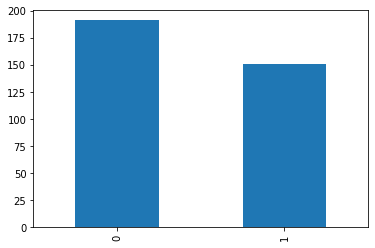

In [7]:
train_df['press'].value_counts().plot(kind='bar')
train_df['press'].value_counts()
train_df

,time,title,url,press
343,2021-06-15 00:28:59.007769,"""K팝 아시죠?"" 김정숙 여사 질문에 ""BTS!""..빈 미술사박물관 웃음꽃",https://news.v.daum.net/v/20210615001641403,1
344,2021-06-14 23:58:58.438876,"산은, HMM CB 주식 전환..쌍용차는 ""투자자가 결정""",https://news.v.daum.net/v/20210614182932216,1
345,2021-06-14 23:58:58.438870,"""나토, 정상회의 공동성명에 '중국 행동은 구조적 도전' 명시 예정""",https://news.v.daum.net/v/20210614225917610,0
346,2021-06-14 23:58:58.438864,"文대통령, 오스트리아 정상회담 ""수소 분야 협력하면 시너지효과""",https://news.v.daum.net/v/20210614230202645,1
347,2021-06-14 23:58:58.438839,"검찰 이첩 안했는데..공수처, '김학의 사건' 연루 문홍성 입건",https://news.v.daum.net/v/20210614230254650,0
...,...,...,...,...
423,2021-06-14 14:28:45.709287,"검찰, 이규원 검사 첫 소환..'과거사 조사단 의혹' 수사",https://news.v.daum.net/v/20210614142534200,1
424,2021-06-14 13:58:45.137030,"스가 ""문 대통령이 인사하러 와서, 실례 안 되게 인사한 것""",https://news.v.daum.net/v/20210614125602316,1
425,2021-06-14 13:58:45.137024,"""중견기업 ESG 경영, 제도적 인센티브 뒷받침 돼야""",https://news.v.daum.net/v/20210614125903376,0
426,2021-06-14 13:58:45.137018,경찰 출신 변호사 '사적접촉 금지' 기간 5년으로 확대,https://news.v.daum.net/v/20210614134613589,1


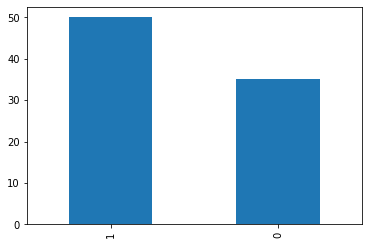

In [8]:

test_df['press'].value_counts().plot(kind='bar')
test_df['press'].value_counts()
test_df

In [9]:
#정규표현식 함수

import re
def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [10]:
from konlpy.tag import Okt #명사 형태소 추출함수

okt = Okt()
X_train = []
for sentence in train_df['title']:
    temp_X = okt.morphs(apply_regular_expression(sentence), stem=True) # 토큰화
    X_train.append(temp_X)


X_test = []
for sentence in test_df['title']:
    temp_X = okt.morphs(apply_regular_expression(sentence), stem=True) # 토큰화
    X_test.append(temp_X)

In [11]:
print(X_train[:2])
print(X_test[:2])

[['정부', '법원', '한', '국내', '재산', '공개', '명령', '에', '불응', '시사'], ['유통', '망', '커머스', '노하우', '시너지', '기대승', '자', '의', '저주', '우려', '도']]
[['팝', '아시', '죠', '김정숙', '여사', '질문', '에', '빈', '미술사', '박물관', '웃음꽃'], ['산', '은', '주식', '전환', '쌍용차', '는', '투자자', '가', '결정']]


In [12]:
tokenizer = Tokenizer() #단어를 자동으로 선택
tokenizer.fit_on_texts(X_train) #tokenizer에 맞게 단어 인덱스를 구축


In [13]:
print(tokenizer.word_index) #계산된 단어 인덱스를 dict 형태로 변환


{'에': 1, '하다': 2, '한': 3, '도': 4, '의': 5, '로': 6, '중국': 7, '만': 8, '이': 9, '되다': 10, '못': 11, '은': 12, '적': 13, '나토': 14, '최저임금': 15, '명': 16, '접종': 17, '시간': 18, '푸틴': 19, '는': 20, '월': 21, '대통령': 22, '바이든': 23, '들': 24, '백신': 25, '대': 26, '백': 27, '자': 28, '친구': 29, '으로': 30, '공': 31, '도전': 32, '법원': 33, '이준석': 34, '서': 35, '국제': 36, '문': 37, '몸무게': 38, '년': 39, '개': 40, '정부': 41, '째': 42, '과': 43, '정상회담': 44, '만원': 45, '올핸': 46, '시급': 47, '표기': 48, '정해': 49, '속도': 50, '내다': 51, '내년': 52, '심의': 53, '가': 54, '화': 55, '신': 56, '수': 57, '일자리': 58, '국내': 59, '재산': 60, '공개': 61, '명령': 62, '불응': 63, '시사': 64, '기업': 65, '예정': 66, '첫': 67, '교황': 68, '방북': 69, '그날': 70, '동거': 71, '감금': 72, '학대': 73, '숨지다': 74, '고작': 75, '방어': 76, '과장': 77, '것': 78, '중': 79, '론': 80, '주': 81, '정상화': 82, '최대': 83, '있다': 84, '총리': 85, '차': 86, '높다': 87, '지키다': 88, '우리': 89, '위협': 90, '말르다': 91, '피해': 92, '이첩': 93, '초단': 94, '윤석열': 95, '최고': 96, '만에': 97, '사건': 98, '안': 99, '이틀': 100, '오늘': 101, '미국': 102, '없다': 

In [14]:
# 빈도 2 이상인 단어를 연산에 이용하기 위해, 빈도가 1인 단어는 제외하는 작업.

threshold = 1
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('총 단어 갯수 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

총 단어 갯수 : 1101
등장 빈도가 0번 이하인 희귀 단어의 수: 0
단어 집합에서 희귀 단어의 비율: 0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0


In [15]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt 
# - rare_cnt + 1
print('출현 빈도가 2회 이상인 단어 집합의 크기 :',vocab_size)


출현 빈도가 2회 이상인 단어 집합의 크기 : 1101


In [16]:
tokenizer = Tokenizer(vocab_size) #빈도가 높은 n개를 우선으로 단어를 선택함.  vocab_size를 넣음으로써 빈도가 2 이상인 단어만 선택.
tokenizer.fit_on_texts(X_train) #tokenizer에 따라 X_train중 빈도가 2 이상인 단어를 가지고, 단어 인덱스를 구축.
X_train = tokenizer.texts_to_sequences(X_train) #문자열을 인덱스의 리스트로 변환, 만약 리스트에 없는 단어라면 [] 공백으로 두어짐.
X_test = tokenizer.texts_to_sequences(X_test) 

In [17]:
print(X_train[:5])
print(X_test[:3])

[[41, 33, 3, 59, 60, 61, 62, 1, 63, 64], [212, 138, 169, 213, 214, 215, 28, 5, 216, 139, 4], [598, 599, 600, 1, 369, 370, 371, 371, 601, 602], [372, 373, 603, 604, 605, 606, 372, 607, 295, 608], [41, 33, 3, 59, 60, 61, 62, 1, 63, 64]]
[[294, 1095, 1096, 573, 574, 575, 1, 1097], [1098, 12, 1099, 165, 1100, 20, 54, 463], [14, 332, 187, 31, 823, 16, 1, 7, 137, 12, 346, 13, 32, 567, 66]]


In [18]:
y_train = np.array(train_df['press'])
y_test = np.array(test_df['press'])


In [19]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,

In [20]:
#패딩
''' 자연어처리를 위해 사용할 모델인 LSTM에 쓸 input은 크기가 일정해야 하므로, padding으로써 초과하는 부분을 자르고 빈 부분을 채워준다.'''

print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 최소 길이 :',min(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))



리뷰의 최대 길이 : 19
리뷰의 최소 길이 : 5
리뷰의 평균 길이 : 10.818713450292398


In [21]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 19
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 19 이하인 샘플의 비율: 100.0


In [22]:
X_train = pad_sequences(X_train, maxlen = max_len) #keras의 pad_sequences : 만약 길이가 짧을 경우 앞 부분을 0으로 채워준다.
X_test = pad_sequences(X_test, maxlen = max_len)

In [23]:
X_train

array([[   0,    0,    0, ...,    1,   63,   64],
       [   0,    0,    0, ...,  216,  139,    4],
       [   0,    0,    0, ...,  371,  601,  602],
       ...,
       [   0,    0,    0, ..., 1097,  143,  124],
       [   0,    0,    0, ...,   20,   54,  463],
       [   0,    0,    0, ...,   37,  167,  168]], dtype=int32)

# **LSTM 모델**

In [24]:
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [25]:
print(len(X_train[0]))

19


In [26]:
model1 = Sequential() #레이어를 선형으로 연결하여 구성. add로 층을 쌓음
model1.add(Embedding(vocab_size, 19)) #사용된 단어의 수, input 하나 당 size
model1.add(LSTM(32)) #LSTM 입력층 32개의 메모리셀을 가짐.
model1.add(Dense(16, activation='sigmoid')) #Dense = 1차원 연산에 능한 FC(fully-connected layer) 16개의 노드가 있는 은닉층 
# model1.add(Dense(8, activation='sigmoid'))  #8개의 노드가 있는 은닉층 #여기서는 사용 안 함.
model1.add(Dense(1, activation='sigmoid'))  #output차원, 예측하고자 하는 target의 개수가 1이므로 1층으로 설정
#활성화 함수는 sigmoid

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

#검증데이터의 정확도 (val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train, y_train, epochs=9, batch_size=10, validation_split=0.2, callbacks=[mc])


Epoch 1/9
28/28 [==============================] - 3s 39ms/step - loss: 0.7144 - accuracy: 0.5604 - val_loss: 0.6365 - val_accuracy: 0.6087
Epoch 2/9
28/28 [==============================] - 0s 10ms/step - loss: 0.6232 - accuracy: 0.6667 - val_loss: 0.6190 - val_accuracy: 0.7971
Epoch 3/9
28/28 [==============================] - 0s 9ms/step - loss: 0.5294 - accuracy: 0.8168 - val_loss: 0.5806 - val_accuracy: 0.6667
Epoch 4/9
28/28 [==============================] - 0s 10ms/step - loss: 0.4466 - accuracy: 0.8681 - val_loss: 0.5305 - val_accuracy: 0.7971
Epoch 5/9
28/28 [==============================] - 0s 9ms/step - loss: 0.3555 - accuracy: 0.9194 - val_loss: 0.5130 - val_accuracy: 0.7826
Epoch 6/9
28/28 [==============================] - 0s 10ms/step - loss: 0.2960 - accuracy: 0.9377 - val_loss: 0.4783 - val_accuracy: 0.8551
Epoch 7/9
28/28 [==============================] - 0s 9ms/step - loss: 0.2284 - accuracy: 0.9634 - val_loss: 0.5058 - val_accuracy: 0.7826
Epoch 8/9
28/28 [======

In [27]:
model2 = Sequential()
model2.add(Embedding(vocab_size, 19)) #사용된 단어의 수, input 하나 당 size
model2.add(LSTM(32))
# model2.add(Dense(16, activation='sigmoid'))
# model2.add(Dense(8, activation='sigmoid')) 
model2.add(Dense(1, activation='sigmoid')) 
#활성화 함수는 sigmoid

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')


#검증데이터의 정확도 (val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train, y_train, epochs=7, batch_size=10, validation_split=0.2, callbacks=[mc])


Epoch 1/7
28/28 [==============================] - 4s 26ms/step - loss: 0.6870 - accuracy: 0.5751 - val_loss: 0.6820 - val_accuracy: 0.6087
Epoch 2/7
28/28 [==============================] - 0s 10ms/step - loss: 0.6239 - accuracy: 0.6593 - val_loss: 0.6200 - val_accuracy: 0.6377
Epoch 3/7
28/28 [==============================] - 0s 10ms/step - loss: 0.4375 - accuracy: 0.8315 - val_loss: 0.6021 - val_accuracy: 0.6522
Epoch 4/7
28/28 [==============================] - 0s 10ms/step - loss: 0.3389 - accuracy: 0.8791 - val_loss: 0.6004 - val_accuracy: 0.5652
Epoch 5/7
28/28 [==============================] - 0s 10ms/step - loss: 0.2753 - accuracy: 0.9304 - val_loss: 0.5303 - val_accuracy: 0.7971
Epoch 6/7
28/28 [==============================] - 0s 12ms/step - loss: 0.2027 - accuracy: 0.9377 - val_loss: 0.5644 - val_accuracy: 0.6957
Epoch 7/7
28/28 [==============================] - 0s 10ms/step - loss: 0.1387 - accuracy: 0.9597 - val_loss: 0.5694 - val_accuracy: 0.7681


In [28]:
model3 = Sequential()
model3.add(Embedding(vocab_size, 19)) #사용된 단어의 수, input 하나 당 size
model3.add(LSTM(32))
# model3.add(Dense(16, activation='sigmoid'))
# model3.add(Dense(8, activation='sigmoid')) 
model3.add(Dense(1, activation='relu')) 

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

#검증데이터의 정확도 (val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model3.fit(X_train, y_train, epochs=6, batch_size=10, validation_split=0.2, callbacks=[mc])


Epoch 1/6
28/28 [==============================] - 4s 51ms/step - loss: 0.9881 - accuracy: 0.5604 - val_loss: 0.6269 - val_accuracy: 0.6232
Epoch 2/6
28/28 [==============================] - 0s 10ms/step - loss: 0.5055 - accuracy: 0.7912 - val_loss: 0.5649 - val_accuracy: 0.8261
Epoch 3/6
28/28 [==============================] - 0s 9ms/step - loss: 0.3355 - accuracy: 0.8645 - val_loss: 0.5229 - val_accuracy: 0.7826
Epoch 4/6
28/28 [==============================] - 0s 12ms/step - loss: 0.2538 - accuracy: 0.9267 - val_loss: 0.5144 - val_accuracy: 0.7826
Epoch 5/6
28/28 [==============================] - 0s 9ms/step - loss: 0.1892 - accuracy: 0.9451 - val_loss: 0.7651 - val_accuracy: 0.6957
Epoch 6/6
28/28 [==============================] - 0s 9ms/step - loss: 0.0715 - accuracy: 0.9780 - val_loss: 0.5719 - val_accuracy: 0.7681


In [29]:
model4 = Sequential()
model4.add(Embedding(vocab_size, 19)) #사용된 단어의 수, input 하나 당 size
model4.add(LSTM(64))
model4.add(Dense(16, activation='sigmoid'))
model4.add(Dense(8, activation='sigmoid')) 
model4.add(Dense(1, activation='sigmoid')) 

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')


#검증데이터의 정확도 (val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model4.fit(X_train, y_train, epochs=6, batch_size=10, validation_split=0.2, callbacks=[mc])


Epoch 1/6
28/28 [==============================] - 6s 56ms/step - loss: 0.7292 - accuracy: 0.4542 - val_loss: 0.7020 - val_accuracy: 0.3913
Epoch 2/6
28/28 [==============================] - 0s 12ms/step - loss: 0.6948 - accuracy: 0.4725 - val_loss: 0.6910 - val_accuracy: 0.6087
Epoch 3/6
28/28 [==============================] - 0s 12ms/step - loss: 0.6911 - accuracy: 0.5458 - val_loss: 0.6834 - val_accuracy: 0.6087
Epoch 4/6
28/28 [==============================] - 0s 12ms/step - loss: 0.6901 - accuracy: 0.5458 - val_loss: 0.6819 - val_accuracy: 0.6087
Epoch 5/6
28/28 [==============================] - 0s 14ms/step - loss: 0.6902 - accuracy: 0.5458 - val_loss: 0.6822 - val_accuracy: 0.6087
Epoch 6/6
28/28 [==============================] - 0s 12ms/step - loss: 0.6740 - accuracy: 0.6337 - val_loss: 0.7250 - val_accuracy: 0.3913


In [30]:
model5=0
model5 = Sequential()
model5.add(Embedding(vocab_size, 19)) #사용된 단어의 수, input 하나 당 size
model5.add(LSTM(64))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(16, activation='relu'))
model5.add(Dense(8, activation='relu')) 
model5.add(Dense(1, activation='relu')) 

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')


#검증데이터의 정확도 (val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model5.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model5.fit(X_train, y_train, epochs=5, batch_size=10, validation_split=0.2, callbacks=[mc])


Epoch 1/5
28/28 [==============================] - 4s 41ms/step - loss: 1.2370 - accuracy: 0.5421 - val_loss: 0.6120 - val_accuracy: 0.6667
Epoch 2/5
28/28 [==============================] - 0s 12ms/step - loss: 0.6013 - accuracy: 0.6960 - val_loss: 0.6574 - val_accuracy: 0.6087
Epoch 3/5
28/28 [==============================] - 0s 12ms/step - loss: 0.4649 - accuracy: 0.7875 - val_loss: 0.5315 - val_accuracy: 0.8261
Epoch 4/5
28/28 [==============================] - 0s 11ms/step - loss: 0.3449 - accuracy: 0.8791 - val_loss: 0.5490 - val_accuracy: 0.6522
Epoch 5/5
28/28 [==============================] - 0s 12ms/step - loss: 0.1665 - accuracy: 0.9304 - val_loss: 1.1080 - val_accuracy: 0.7101


In [31]:
model6 = Sequential()
model6.add(Embedding(vocab_size, 19)) #사용된 단어의 수, input 하나 당 size
model6.add(LSTM(64))
model6.add(Dense(16, activation='sigmoid'))
model6.add(Dense(8, activation='relu')) 
model6.add(Dense(1, activation='relu')) 

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')


#검증데이터의 정확도 (val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model6.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model6.fit(X_train, y_train, epochs=6, batch_size=10, validation_split=0.2, callbacks=[mc])


Epoch 1/6
28/28 [==============================] - 4s 42ms/step - loss: 7.0062 - accuracy: 0.5458 - val_loss: 6.0358 - val_accuracy: 0.6087
Epoch 2/6
28/28 [==============================] - 0s 13ms/step - loss: 7.0062 - accuracy: 0.5458 - val_loss: 6.0358 - val_accuracy: 0.6087
Epoch 3/6
28/28 [==============================] - 0s 13ms/step - loss: 7.0062 - accuracy: 0.5458 - val_loss: 6.0358 - val_accuracy: 0.6087
Epoch 4/6
28/28 [==============================] - 0s 12ms/step - loss: 7.0062 - accuracy: 0.5458 - val_loss: 6.0358 - val_accuracy: 0.6087
Epoch 5/6
28/28 [==============================] - 0s 13ms/step - loss: 7.0062 - accuracy: 0.5458 - val_loss: 6.0358 - val_accuracy: 0.6087
Epoch 6/6
28/28 [==============================] - 0s 12ms/step - loss: 7.0062 - accuracy: 0.5458 - val_loss: 6.0358 - val_accuracy: 0.6087


In [32]:
model7 = Sequential()
model7.add(Embedding(vocab_size, 19)) #사용된 단어의 수, input 하나 당 size
model7.add(LSTM(64))
model7.add(Dense(16, activation='sigmoid'))
model7.add(Dense(8, activation='relu')) 
model7.add(Dense(1, activation='sigmoid')) 

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

#검증데이터의 정확도 (val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model7.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model7.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model7.fit(X_train, y_train, epochs=6, batch_size=10, validation_split=0.2, callbacks=[mc])


Epoch 1/6
28/28 [==============================] - 6s 71ms/step - loss: 0.7116 - accuracy: 0.4542 - val_loss: 0.7052 - val_accuracy: 0.3913
Epoch 2/6
28/28 [==============================] - 0s 12ms/step - loss: 0.6861 - accuracy: 0.4542 - val_loss: 0.6973 - val_accuracy: 0.3913
Epoch 3/6
28/28 [==============================] - 0s 12ms/step - loss: 0.6444 - accuracy: 0.4689 - val_loss: 0.6851 - val_accuracy: 0.4493
Epoch 4/6
28/28 [==============================] - 0s 12ms/step - loss: 0.5148 - accuracy: 0.8535 - val_loss: 0.5777 - val_accuracy: 0.6957
Epoch 5/6
28/28 [==============================] - 0s 13ms/step - loss: 0.3625 - accuracy: 0.9194 - val_loss: 0.5550 - val_accuracy: 0.6957
Epoch 6/6
28/28 [==============================] - 0s 11ms/step - loss: 0.2487 - accuracy: 0.9414 - val_loss: 0.5377 - val_accuracy: 0.6957


In [33]:
model8 = Sequential()
model8.add(Embedding(vocab_size, 19)) #사용된 단어의 수, input 하나 당 size
model8.add(LSTM(64))
model8.add(Dense(16, activation='sigmoid'))
model8.add(Dense(8, activation='relu')) 
model8.add(Dense(1, activation='relu')) 

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')


#검증데이터의 정확도 (val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model8.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model8.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model8.fit(X_train, y_train, epochs=5, batch_size=10, validation_split=0.2, callbacks=[mc])


Epoch 1/5
28/28 [==============================] - 5s 43ms/step - loss: 0.6799 - accuracy: 0.5568 - val_loss: 0.7361 - val_accuracy: 0.3913
Epoch 2/5
28/28 [==============================] - 0s 11ms/step - loss: 0.6168 - accuracy: 0.7692 - val_loss: 0.6327 - val_accuracy: 0.7971
Epoch 3/5
28/28 [==============================] - 0s 12ms/step - loss: 0.4528 - accuracy: 0.8278 - val_loss: 0.5718 - val_accuracy: 0.7246
Epoch 4/5
28/28 [==============================] - 0s 11ms/step - loss: 0.3761 - accuracy: 0.8718 - val_loss: 0.6119 - val_accuracy: 0.6377
Epoch 5/5
28/28 [==============================] - 0s 13ms/step - loss: 0.2013 - accuracy: 0.9194 - val_loss: 0.8651 - val_accuracy: 0.5652


In [34]:
model9 = 0
model9 = Sequential()
model9.add(Embedding(vocab_size, 19)) #사용된 단어의 수, input 하나 당 size
model9.add(LSTM(32))
model9.add(Dense(16, activation='sigmoid'))
model9.add(Dense(8, activation='relu')) 
model9.add(Dense(1, activation='relu')) 

X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

#검증데이터의 정확도 (val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model9.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


model9.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model9.fit(X_train, y_train, epochs=4, batch_size=10, validation_split=0.2, callbacks=[mc])


Epoch 1/4
28/28 [==============================] - 4s 27ms/step - loss: 7.0062 - accuracy: 0.5458 - val_loss: 6.0358 - val_accuracy: 0.6087
Epoch 2/4
28/28 [==============================] - 0s 10ms/step - loss: 7.0062 - accuracy: 0.5458 - val_loss: 6.0358 - val_accuracy: 0.6087
Epoch 3/4
28/28 [==============================] - 0s 10ms/step - loss: 7.0062 - accuracy: 0.5458 - val_loss: 6.0358 - val_accuracy: 0.6087
Epoch 4/4
28/28 [==============================] - 0s 10ms/step - loss: 7.0062 - accuracy: 0.5458 - val_loss: 6.0358 - val_accuracy: 0.6087
